In [ ]:
from keras.applications import VGG16
from keras.models import  Sequential
from keras.layers import Dense, Flatten, Dropout

In [ ]:
base_model = VGG16(include_top=False,input_shape=(150,150,3),weights='imagenet')
base_model.summary()

58892288/58889256 [==============================] - 2s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
______________________________________________________________

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
import os
import  numpy as np

In [ ]:
base_dir = '/content/drive/MyDrive/jupyter_notebooks/deep_learning_fc/data/cats-dogs-dataset'

In [ ]:
train_dir = os.path.join(base_dir,'train')
val_dir = os.path.join(base_dir,'validation')
test_dir = os.path.join(base_dir,'test')

In [ ]:
print(len(os.listdir(os.path.join(train_dir,'cats'))),len(os.listdir(os.path.join(train_dir,'dogs'))))
print(len(os.listdir(os.path.join(val_dir,'cats'))),len(os.listdir(os.path.join(val_dir,'dogs'))))
print(len(os.listdir(os.path.join(test_dir,'cats'))),len(os.listdir(os.path.join(test_dir,'dogs'))))

1000 1000
500 500
500 500


# **mtd-1**

In [ ]:
#Running the convolutional base over our dataset, recording its output to a Numpy array on disk, 
#then using this data as input to a standalone densely-connected classifier. 
#This solution is very fast and cheap to run, because it only requires running the convolutional base once for every input image, 
#and the convolutional base is by far the most expensive part of the pipeline.
# However, for the exact same reason, this technique would not allow us to leverage data augmentation at all.

In [ ]:
data_gen = ImageDataGenerator(rescale=1./255)
batch_size=20

def get_features(n_samples, dir):
  data = np.zeros((n_samples,4,4,512))
  labels = np.zeros(n_samples)
  gen = data_gen.flow_from_directory(dir,target_size=(150,150),class_mode='binary',batch_size = batch_size)
  
  i=0
  for data_batch,label_batch in gen:
    feature_batch = base_model.predict(data_batch)
    data[i*batch_size:(i+1)*batch_size] = feature_batch
    labels[i*batch_size:(i+1)*batch_size] = label_batch

    i+=1

    if batch_size*i >= n_samples:
      break
  return data, labels
     

train_data,train_lab = get_features(2000,train_dir)
val_data, val_lab = get_features(1000,val_dir)
test_data, test_lab = get_features(1000,test_dir)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
x_train = train_data.reshape(-1,(4*4*512))
x_test = test_data.reshape(-1,(4*4*512))
x_val = val_data.reshape(-1,(4*4*512))

In [ ]:
from keras import optimizers 
classifier = Sequential()
classifier.add(Dense(256,activation='relu',input_shape=(4*4*512,)))
classifier.add(Dropout(0.3))
classifier.add(Dense(1,activation = 'sigmoid'))
classifier.compile(optimizer = optimizers.RMSprop(learning_rate=1e-4),loss='binary_crossentropy',metrics=['acc'])

In [ ]:
classifier.fit(x_train,train_lab,epochs=30,batch_size=32,validation_data=(x_val,val_lab))

Epoch 1/30
63/63 [==============================] - 3s 35ms/step - loss: 0.5648 - acc: 0.7127 - val_loss: 0.3142 - val_acc: 0.8510
Epoch 2/30
63/63 [==============================] - 2s 27ms/step - loss: 0.2878 - acc: 0.8822 - val_loss: 0.2886 - val_acc: 0.8740
Epoch 3/30
63/63 [==============================] - 2s 27ms/step - loss: 0.2190 - acc: 0.9169 - val_loss: 0.2660 - val_acc: 0.8770
Epoch 4/30
63/63 [==============================] - 2s 27ms/step - loss: 0.1904 - acc: 0.9346 - val_loss: 0.2769 - val_acc: 0.8710
Epoch 5/30
63/63 [==============================] - 2s 27ms/step - loss: 0.1508 - acc: 0.9404 - val_loss: 0.2759 - val_acc: 0.8780
Epoch 6/30
63/63 [==============================] - 2s 27ms/step - loss: 0.1454 - acc: 0.9417 - val_loss: 0.2536 - val_acc: 0.8890
Epoch 7/30
63/63 [==============================] - 2s 27ms/step - loss: 0.1121 - acc: 0.9676 - val_loss: 0.2752 - val_acc: 0.8840
Epoch 8/30
63/63 [==============================] - 2s 27ms/step - loss: 0.0928 - a

In [ ]:
classifier.save('/content/drive/MyDrive/jupyter_notebooks/deep_learning_fc/models/VGG1.h5')

# **Model Evaluation**

In [ ]:
dict_ = classifier.history.history
dict_.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

In [ ]:
train_acc = dict_['acc']
train_loss = dict_['loss']
val_acc = dict_['val_acc']
val_loss = dict_['val_loss']
epochs = range(1,len(train_acc)+1)

**Training v/s Validation**

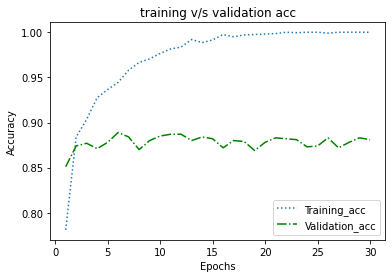

In [ ]:
import matplotlib.pyplot as plt

plt.plot(epochs,train_acc,ls=':',label='Training_acc')
plt.plot(epochs,val_acc,ls='-.',color='green',label='Validation_acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('training v/s validation acc')
plt.legend()

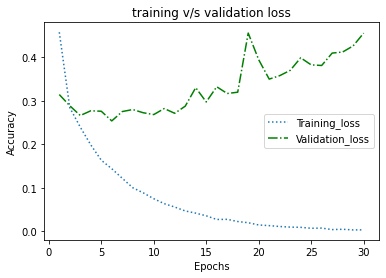

In [ ]:
plt.plot(epochs,train_loss,ls=':',label='Training_loss')
plt.plot(epochs,val_loss,ls='-.',color='green',label='Validation_loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('training v/s validation loss')
plt.legend()

# **mtd-2**

In [ ]:
#Extending conv_base by adding Dense layers on top, and running the whole thing end-to-end on the input data.
#This allows us to use data augmentation, because every input image is going through the convolutional base every time
#it is seen by the model. However, for this same reason, this technique is far more expensive than the first one.

In [ ]:
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dropout(0.3))
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
from keras import optimizers 
model.compile(optimizer = optimizers.RMSprop(learning_rate=1e-4),loss='binary_crossentropy',metrics=['acc'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dropout (Dropout)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               2097408   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 2,097,665
Non-trainable params: 14,714,688
_________________________________________________________________


# **data augmentation**

In [ ]:
train_data_gen = ImageDataGenerator(rescale=1./255, 
                                    height_shift_range=0.2,
                                    width_shift_range=0.2,
                                    rotation_range=40,
                                    shear_range=0.2,
                                    zoom_range = 0.2,
                                    horizontal_flip=True,
                                    fill_mode='nearest',)

#Note that the validation data shouldn't be augmented..!
test_data_gen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_gen = train_data_gen.flow_from_directory(train_dir,target_size=(150,150),class_mode='binary',batch_size = 20,)
test_gen = test_data_gen.flow_from_directory(train_dir,target_size=(150,150),class_mode='binary',batch_size = 20)

Found 2000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [ ]:
 #Before training our model, a very important thing to do is to freeze the convolutional base. "Freezing" a layer 
 #or set of layers means preventing their weights from getting updated during training. If we don't do this, then
 #the representations that were previously learned by the convolutional base would get modified during training.

In [ ]:
base_model.trainable = False
                             #This step was not required in the last mtd
                             #since, we were using  conv_base_model for prediction purpose only.
                             #Hence, there was no training of conv_base_model
                             #But here, we are training the conv_base_model by ---->> model.fit()
                             #that's why this step is required .so that while training learned representations 
                             #of conv_base_model wouldn't get modified.

In [ ]:
# base_model.trainable = False is ineffective

for layer in base_model.layers:
  
  print(layer.name,layer.trainable)

input_1 True
block1_conv1 True
block1_conv2 True
block1_pool True
block2_conv1 True
block2_conv2 True
block2_pool True
block3_conv1 True
block3_conv2 True
block3_conv3 True
block3_pool True
block4_conv1 True
block4_conv2 True
block4_conv3 True
block4_pool True
block5_conv1 True
block5_conv2 True
block5_conv3 True
block5_pool True


In [ ]:
#The workaround is to set all inner layers to conv_base as non-trainable:

for layer in base_model.layers:
  layer.trainable = False

In [ ]:
for layer in base_model.layers:
  print(layer.name,layer.trainable)

input_1 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 False
block5_conv2 False
block5_conv3 False
block5_pool False


In [ ]:
model.fit_generator(train_gen,epochs=10,steps_per_epoch=100,validation_data=test_gen,validation_steps=50)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
100/100 [==============================] - 669s 7s/step - loss: 0.6040 - acc: 0.6678 - val_loss: 0.3282 - val_acc: 0.8640
Epoch 2/10
100/100 [==============================] - 666s 7s/step - loss: 0.4535 - acc: 0.7778 - val_loss: 0.2855 - val_acc: 0.8860
Epoch 3/10
100/100 [==============================] - 665s 7s/step - loss: 0.3785 - acc: 0.8231 - val_loss: 0.2739 - val_acc: 0.8870
Epoch 4/10
100/100 [==============================] - 665s 7s/step - loss: 0.3706 - acc: 0.8441 - val_loss: 0.2629 - val_acc: 0.8920
Epoch 5/10
100/100 [==============================] - 668s 7s/step - loss: 0.3785 - acc: 0.8244 - val_loss: 0.2551 - val_acc: 0.8960
Epoch 6/10
100/100 [==============================] - 665s 7s/step - loss: 0.3404 - acc: 0.8462 - val_loss: 0.2361 - val_acc: 0.9170
Epoch 7/10
100/100 [==============================] - 664s 7s/step - loss: 0.3639 - acc: 0.8444 - val_loss: 0.2903 - val_acc: 0.8800
Epoch 8/10
100/100 [==============================] - 664s 7s/step - 

In [ ]:
model.save('/content/drive/MyDrive/jupyter_notebooks/deep_learning_fc/models/VGG2.h5')

# **Model Evaluation**

In [ ]:
dict_ = model.history.history
dict_.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

In [ ]:
train_acc = dict_['acc']
train_loss = dict_['loss']
val_acc = dict_['val_acc']
val_loss = dict_['val_loss']
epochs = range(1,len(train_acc)+1)

**Training v/s Validation**

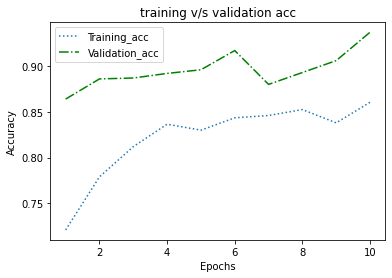

In [ ]:
import matplotlib.pyplot as plt

plt.plot(epochs,train_acc,ls=':',label='Training_acc')
plt.plot(epochs,val_acc,ls='-.',color='green',label='Validation_acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('training v/s validation acc')
plt.legend()

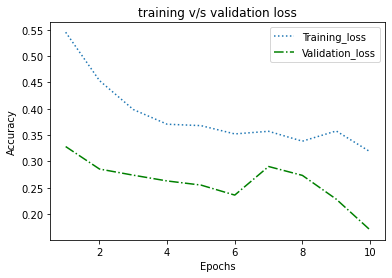

In [ ]:
plt.plot(epochs,train_loss,ls=':',label='Training_loss')
plt.plot(epochs,val_loss,ls='-.',color='green',label='Validation_loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('training v/s validation loss')
plt.legend()

# **Fine tuning**

In [ ]:
#Fine-tuning consists in unfreezing a few of the top layers of a frozen model base used for feature extraction, 
#and jointly training both the newly added part of the model (classifier) and these top layers. 
#This is called "fine-tuning" because it slightly adjusts the more abstract representations of the model being reused, 
#in order to make them more relevant for the problem at hand.

In [ ]:
#it is only possible to fine-tune the top layers of the convolutional base once the classifier on top has already
# been trained. If the classified wasn't already trained, then the error signal propagating through the network during 
#training would be too large, and the representations previously learned by the layers being fine-tuned would be destroyed. 
#Thus the steps for fine-tuning a network are as follow:

# 1) Add your custom network on top of an already trained base network.
# 2) Freeze the base network.
# 3) Train the part you added.
# 4) Unfreeze some layers in the base network.
# 5) Jointly train both these layers and the part you added.

In [ ]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [ ]:
#We have already completed the first 3 steps when doing feature extraction. Let's proceed with the 4th step: 
#We will fine-tune the last 3 convolutional layers, which means that all layers up until block4_pool should be 
#frozen, and the layers block5_conv1, block5_conv2 and block5_conv3 should be trainable.

In [ ]:
set_flag =False
for layer in base_model.layers:
  if layer.name =='block5_conv1':
    set_flag = True

  if set_flag:
    layer.trainable=True
  else:
    pass

In [ ]:
for layer in base_model.layers:
  print(layer.name,layer.trainable)

input_1 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 True
block5_conv2 True
block5_conv3 True
block5_pool True


In [24]:
from keras import optimizers
model.compile(optimizer = optimizers.RMSprop(learning_rate=1e-4),loss='binary_crossentropy',metrics=['acc'])
model.fit_generator(train_gen,epochs=10,steps_per_epoch=100,validation_data=test_gen,validation_steps=50)


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
100/100 [==============================] - 1282s 13s/step - loss: 0.6355 - acc: 0.6642 - val_loss: 0.3362 - val_acc: 0.8580
Epoch 2/10
100/100 [==============================] - 661s 7s/step - loss: 0.4453 - acc: 0.8020 - val_loss: 0.2599 - val_acc: 0.8900
Epoch 3/10
100/100 [==============================] - 661s 7s/step - loss: 0.4183 - acc: 0.8071 - val_loss: 0.2579 - val_acc: 0.8990
Epoch 4/10
100/100 [==============================] - 661s 7s/step - loss: 0.3882 - acc: 0.8335 - val_loss: 0.2284 - val_acc: 0.9050
Epoch 5/10
100/100 [==============================] - 661s 7s/step - loss: 0.3908 - acc: 0.8319 - val_loss: 0.3920 - val_acc: 0.8100
Epoch 6/10
100/100 [==============================] - 661s 7s/step - loss: 0.3823 - acc: 0.8245 - val_loss: 0.2080 - val_acc: 0.9220
Epoch 7/10
100/100 [==============================] - 661s 7s/step - loss: 0.3678 - acc: 0.8385 - val_loss: 0.2140 - val_acc: 0.9240
Epoch 8/10
100/100 [==============================] - 661s 7s/step 

In [25]:
model.save('/content/drive/MyDrive/jupyter_notebooks/deep_learning_fc/models/VGG3_fine_tuned.h5')

# **Model Evaluation**

In [26]:
dict_ = model.history.history
dict_.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

In [27]:
train_acc = dict_['acc']
train_loss = dict_['loss']
val_acc = dict_['val_acc']
val_loss = dict_['val_loss']
epochs = range(1,len(train_acc)+1)

**Training v/s Validation**

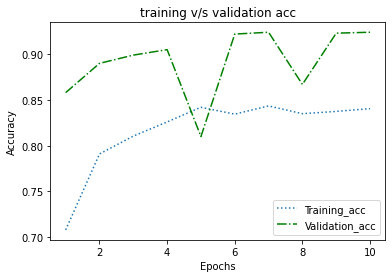

In [29]:
import matplotlib.pyplot as plt

plt.plot(epochs,train_acc,ls=':',label='Training_acc')
plt.plot(epochs,val_acc,ls='-.',color='green',label='Validation_acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('training v/s validation acc')
plt.legend()

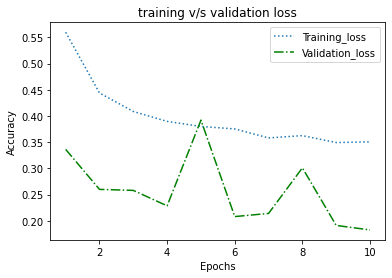

In [30]:
plt.plot(epochs,train_loss,ls=':',label='Training_loss')
plt.plot(epochs,val_loss,ls='-.',color='green',label='Validation_loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('training v/s validation loss')
plt.legend()